In [4]:
## Importing librries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
## loading the data
data=pd.read_csv('ec2_cpu_utilization_24ae8d.csv')

In [6]:
data

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134
...,...,...
4027,2014-02-28 14:05:00,0.132
4028,2014-02-28 14:10:00,0.134
4029,2014-02-28 14:15:00,0.134
4030,2014-02-28 14:20:00,0.134


# Basic Check

In [10]:
# load first five columns
data.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [12]:
# Load last five columns
data.tail()

,timestamp,value
4027,2014-02-28 14:05:00,0.132
4028,2014-02-28 14:10:00,0.134
4029,2014-02-28 14:15:00,0.134
4030,2014-02-28 14:20:00,0.134
4031,2014-02-28 14:25:00,0.134


In [14]:
# Describe mean,max,std value
data.describe()

,value
count,4032.000000
mean,0.126303
std,0.094813
min,0.066000
25%,0.132000
50%,0.134000
75%,0.134000
max,2.344000


In [10]:
# give info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [12]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

# EDA

In [32]:
data=pd.read_csv('ec2_cpu_utilization_24ae8d.csv',parse_dates=[0],index_col='timestamp')

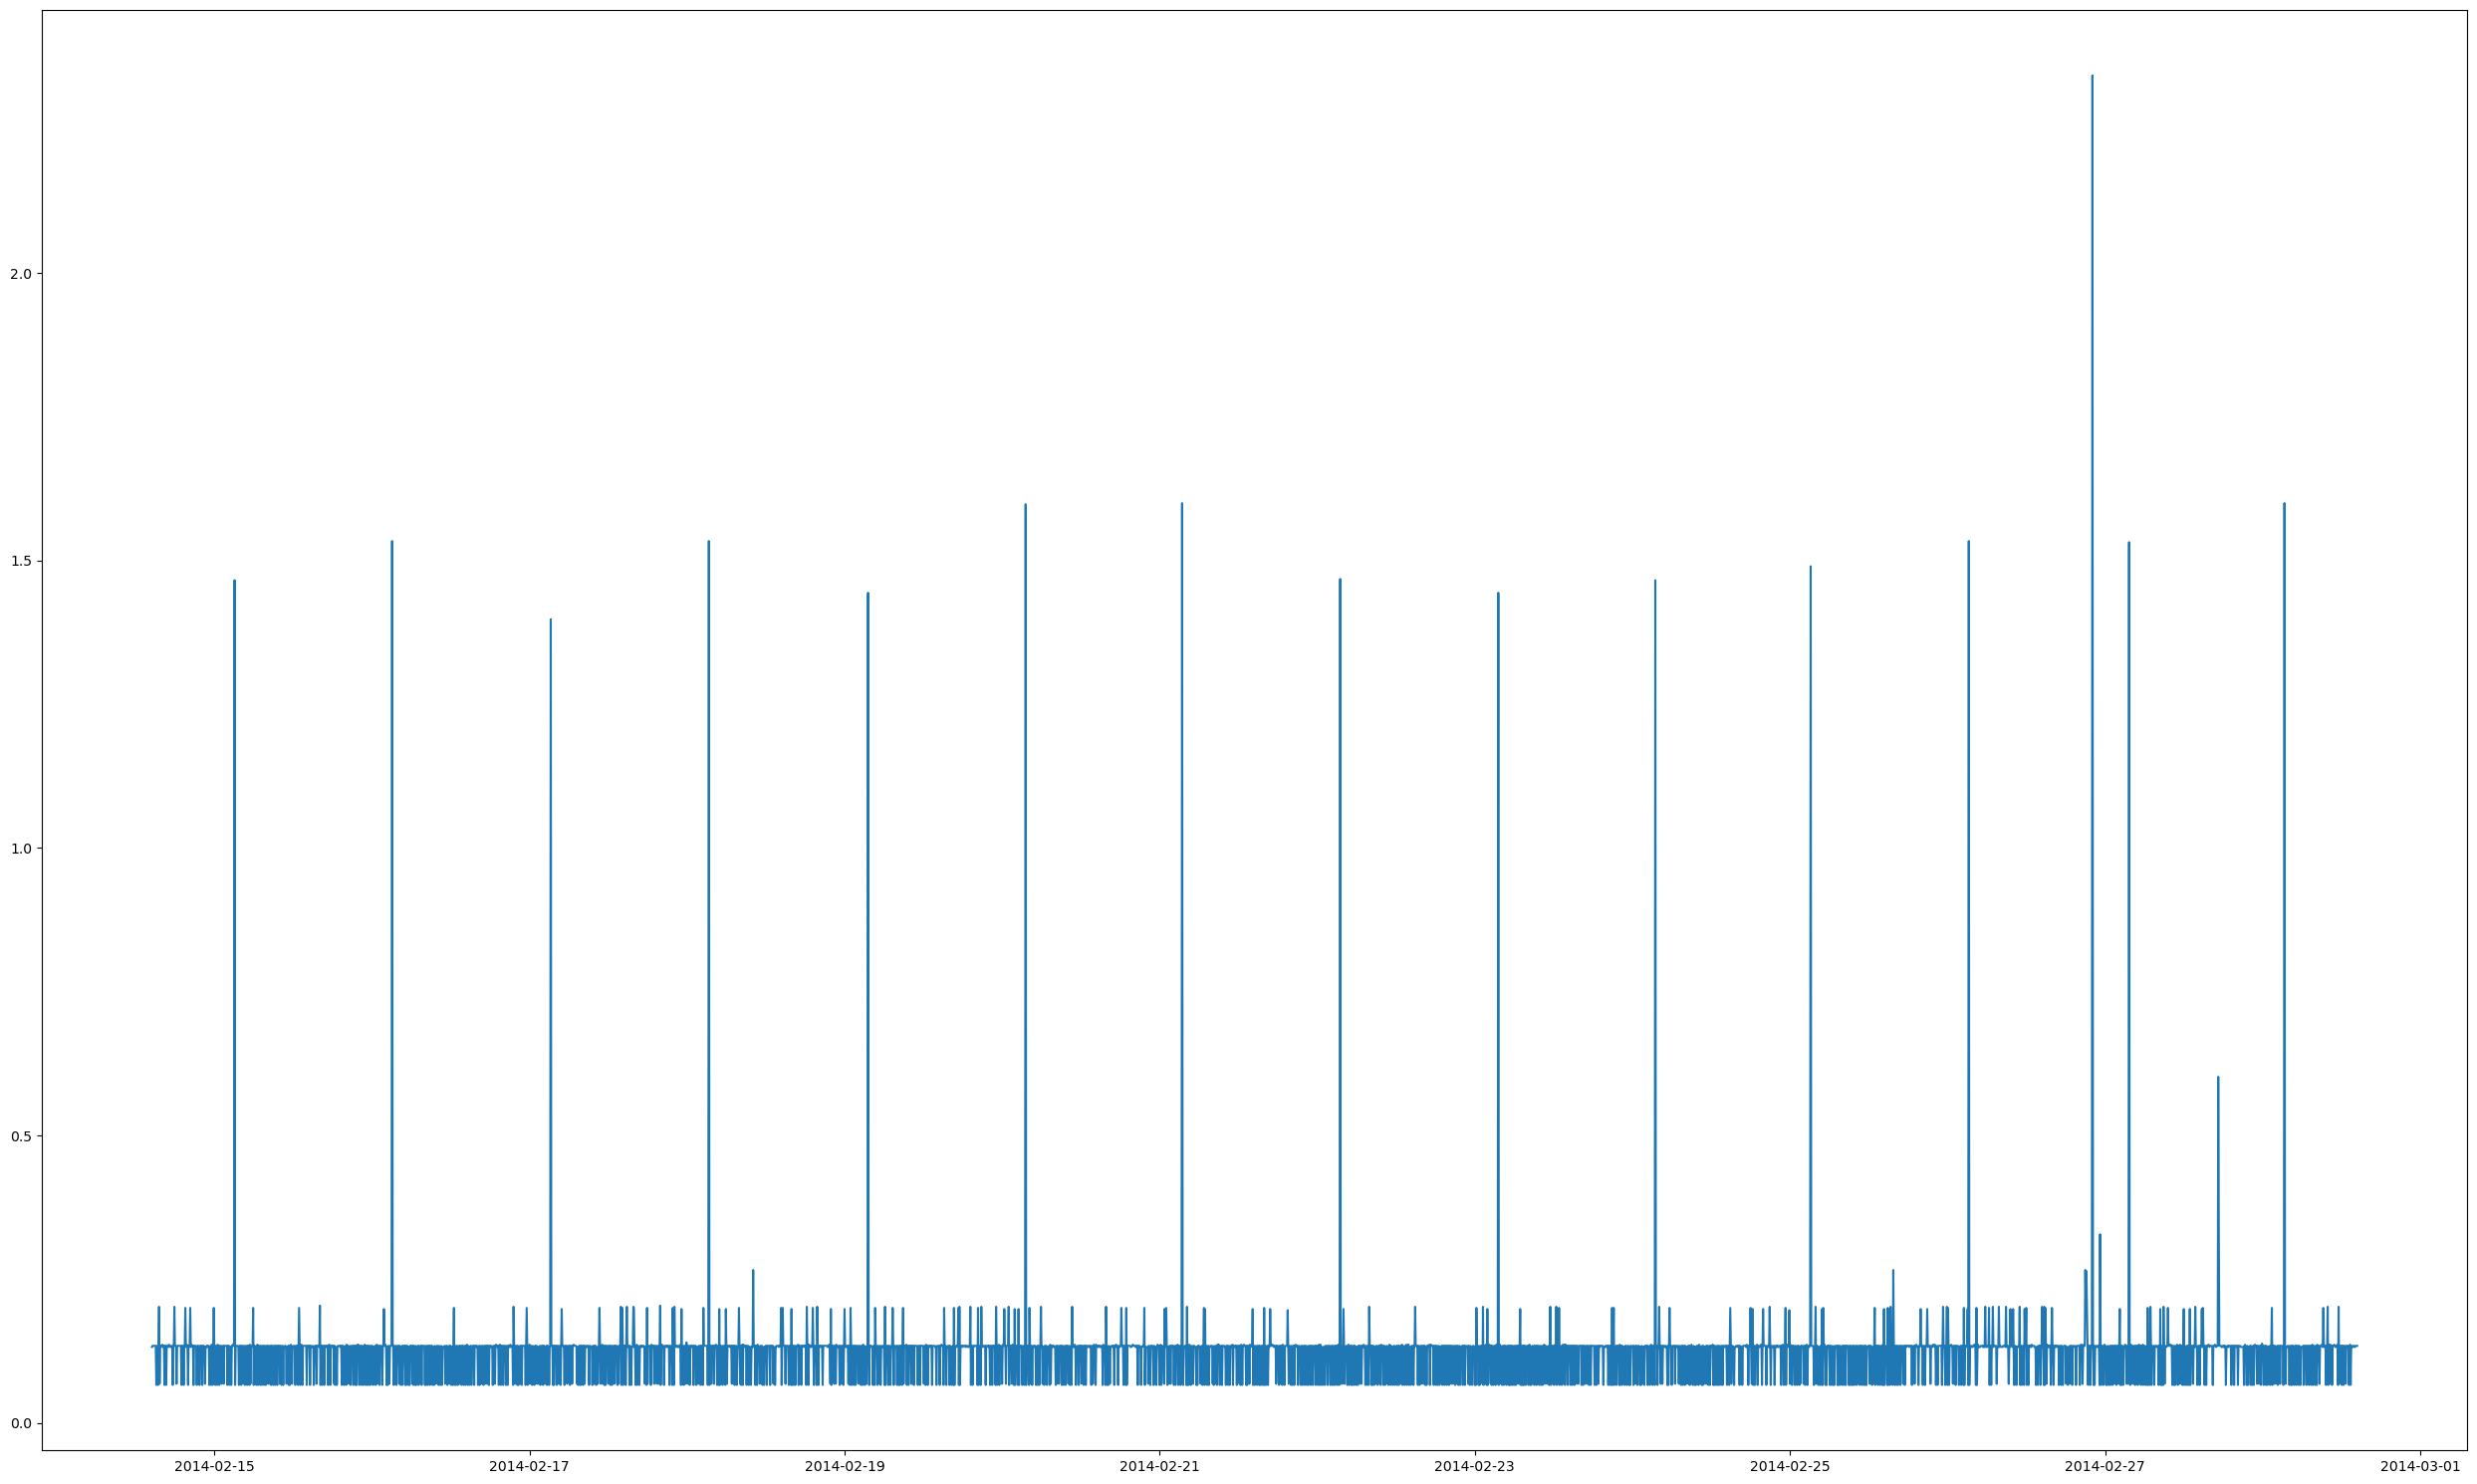

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

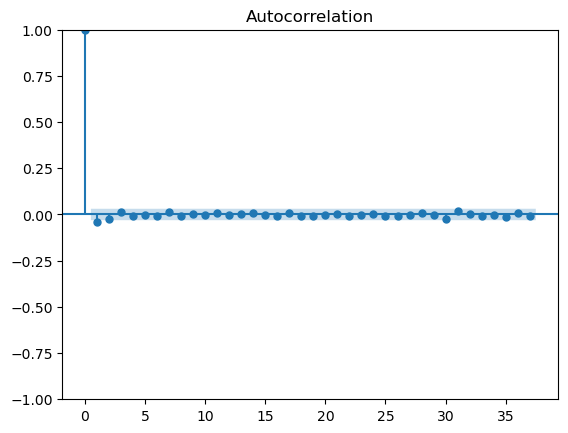

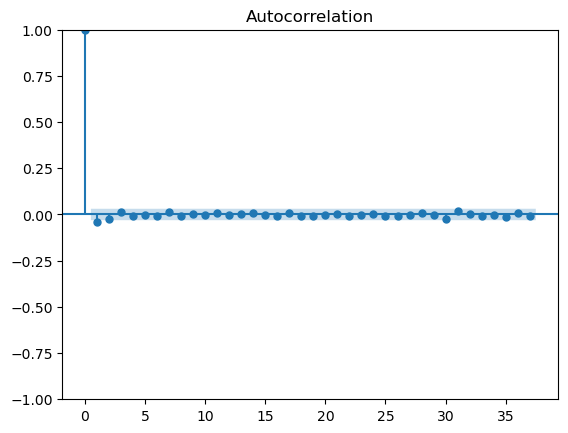

In [36]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [37]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -46.922836318905766
2. P-Value :  0.0
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4030
5. Critical Values :
	 1% :  -3.431973689863888
	 5% :  -2.862257457341372
	 10% :  -2.5671519099310998


In [40]:
data

,value
timestamp,
2014-02-14 14:30:00,0.132
2014-02-14 14:35:00,0.134
2014-02-14 14:40:00,0.134
2014-02-14 14:45:00,0.134
2014-02-14 14:50:00,0.134
...,...
2014-02-28 14:05:00,0.132
2014-02-28 14:10:00,0.134
2014-02-28 14:15:00,0.134


In [42]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [44]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-02-14 14:30:00,NaN
2014-02-14 14:35:00,0.002
2014-02-14 14:40:00,0.000
2014-02-14 14:45:00,0.000
2014-02-14 14:50:00,0.000
...,...
2014-02-28 14:05:00,0.000
2014-02-28 14:10:00,0.002
2014-02-28 14:15:00,0.000


In [46]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-02-14 14:35:00,0.002
2014-02-14 14:40:00,0.000
2014-02-14 14:45:00,0.000
2014-02-14 14:50:00,0.000
2014-02-14 14:55:00,0.000
...,...
2014-02-28 14:05:00,0.000
2014-02-28 14:10:00,0.002
2014-02-28 14:15:00,0.000


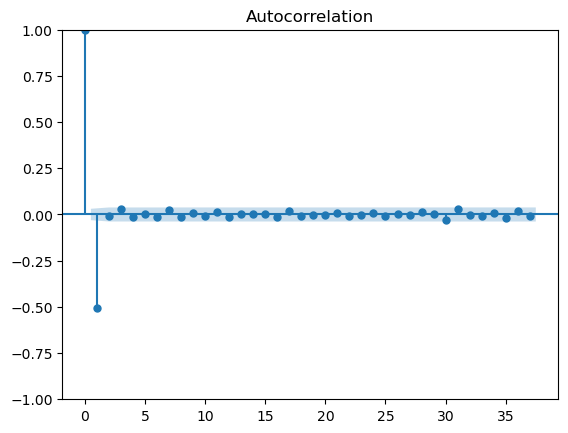

In [48]:
plot_acf(data1); # autocorrelation plot 

In [49]:
data2=data1.diff(periods=1) # differencing applied to data1

In [52]:
data2=data2.iloc[1:] # integrated to the order of 2

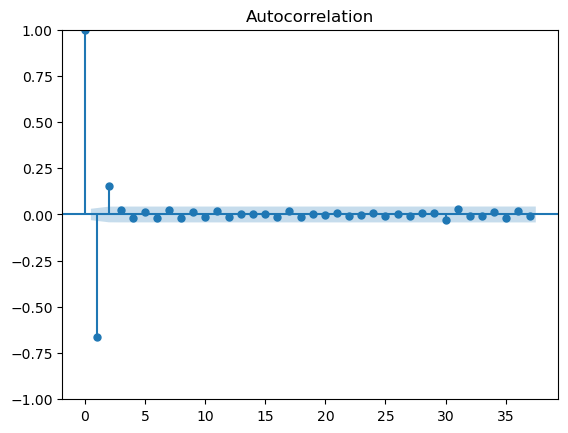

In [54]:
plot_acf(data2);


In [56]:
data2.shape#shape of the data rows and columns

(4030, 1)

In [58]:
data2.shape#shape of the data rows and columns

(4030, 1)

In [60]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [62]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3930 entries, 2014-02-14 23:00:00 to 2014-02-28 14:25:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3930 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


In [64]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [66]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [105]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [121]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

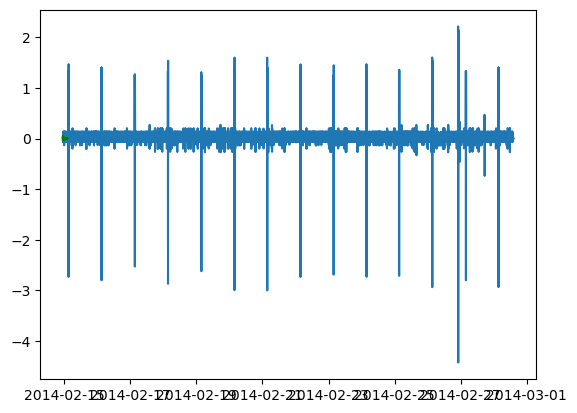

In [123]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [124]:
## ARIMA Model

In [127]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [129]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [131]:
## evaluate the model
print(model_arima_fit.aic)

-186.15373948737837


In [133]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [135]:
prediction

2014-02-14 14:45:00   -2.000000e-03
2014-02-14 14:50:00   -1.439315e-03
2014-02-14 14:55:00    1.569042e-19
2014-02-14 15:00:00   -1.116891e-19
2014-02-14 15:05:00   -4.029947e-28
                           ...     
2014-02-15 02:10:00   -1.489060e-03
2014-02-15 02:15:00   -1.489072e-03
2014-02-15 02:20:00   -1.489063e-03
2014-02-15 02:25:00   -1.489069e-03
2014-02-15 02:30:00   -1.489065e-03
Freq: 5min, Name: predicted_mean, Length: 142, dtype: float64

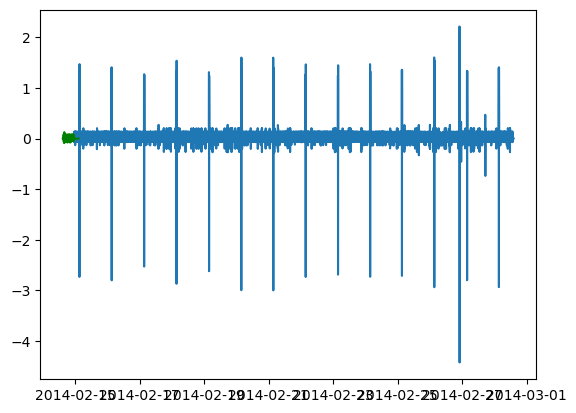

In [137]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [138]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [141]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) -234.06391338776697
(0, 0, 1) -337.2614284333166
(0, 0, 2) -405.35914486437485
(0, 0, 3) -404.97205493454027
(0, 0, 4) -402.42531666887015
(0, 1, 0) -114.52633083344129
(0, 1, 1) -226.08310674766713
(0, 1, 2) -324.0700984951458
(0, 1, 3) -386.07577427273475
(0, 1, 4) -384.3296010468411
(0, 2, 0) 9.105714063738716
(0, 2, 1) -105.75486605907957
(0, 2, 2) -211.91611235796205
(0, 2, 3) -305.21147248424086
(0, 2, 4) -358.27391269962976
(0, 3, 0) 132.86150051870948
(0, 3, 1) 16.62091744365889
(0, 3, 2) -93.303267037836
(0, 3, 3) -195.25240852941346
(0, 3, 4) -218.53517334845904
(0, 4, 0) 255.67853679531916
(0, 4, 1) 139.08887073592268
(0, 4, 2) 27.793293789992987
(0, 4, 3) -77.66019394206606
(0, 4, 4) -175.25746229842858
(1, 0, 0) -286.29841887295606
(1, 0, 1) -362.863200691949
(1, 0, 2) -404.0573995794733
(1, 0, 3) -386.8225594448953
(1, 0, 4) -382.49015369023084
(1, 1, 0) -186.15373948737837
(1, 1, 1) -276.7868103191138
(1, 1, 2) -348.14189226964317
(1, 1, 3) -322.4275723320754
(

In [142]:
min(list2)  # lowest aic score

-405.35914486437485

In [143]:
loc=list2.index(min(list2))
loc

2

In [144]:
# pdq corresponding to lowest aic
list1[loc]

(0, 0, 2)

In [145]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [146]:
print(model_arima_fit.aic) # confirm aic score

-371.10852012828957


In [147]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-02-14 23:00:00   -0.007612
2014-02-14 23:05:00    0.017357
2014-02-14 23:10:00   -0.009686
2014-02-14 23:15:00    0.008898
2014-02-14 23:20:00   -0.009346
2014-02-14 23:25:00    0.007226
2014-02-14 23:30:00   -0.005666
2014-02-14 23:35:00    0.004740
2014-02-14 23:40:00   -0.003480
Freq: 5min, Name: predicted_mean, dtype: float64

In [148]:
prediction=model_arima_fit.predict(start=1,end=142)

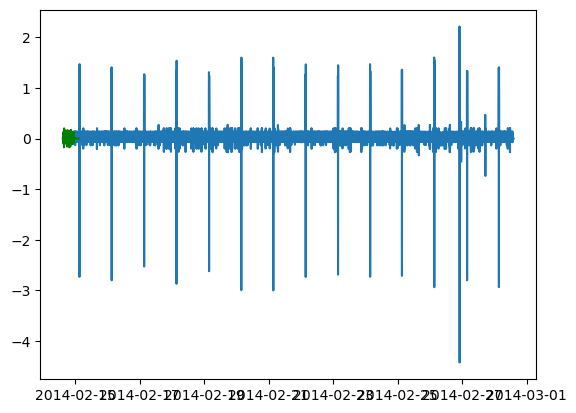

In [149]:
plt.plot(test)
plt.plot(prediction,color='green')

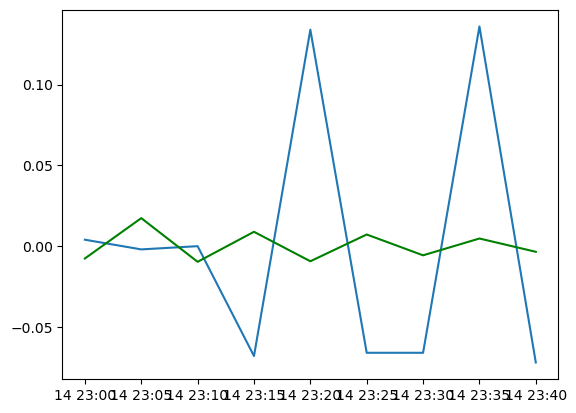

In [150]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [151]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ 0.004, -0.002,  0.   , -0.068,  0.134, -0.066, -0.066,  0.136,
       -0.072, -0.066,  0.136, -0.002, -0.132,  0.066, -0.068,  0.134,
       -0.064, -0.07 ,  0.138, -0.072,  0.002, -0.068,  0.136, -0.068,
        0.   ])

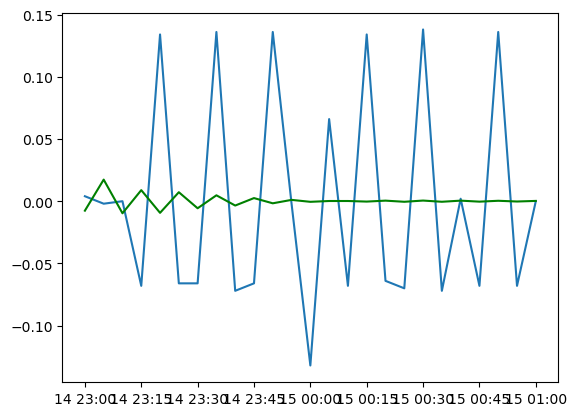

In [152]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [153]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 0.007461792149842562,
 'mae': 0.07276735092383788,
 'rmse': 0.08638166558849489}

In [154]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

0.08638166558849489


0.007461792149842562

# Conclusion
